### NGC 383
1. Import the dataset of all the galaxies with a redshift from NED. 
2. Filter out the photometric redshift (we are only interested in the spectroscopic ones).
3. Import the SDSS dataset from CrossID of NGC 383. 
4. Filter out stars (we are only interested in galaxies).
5. Merge SDSS dataset with redshifts from NED dataset.


SQL query from CrossID to combine as many objects from NED dataset with the SDSS library: 
```SQL
SELECT
    p.objID, p.ra, p.dec, p.run, p.rerun, p.camcol, p.field,
    dbo.fPhotoTypeN(p.type) as type,
    (p.u-p.extinction_u) as u0 , (p.g-p.extinction_g) as g0, 
    (p.r-p.extinction_r) as r0, (p.i-p.extinction_i) as i0, 
    (p.z-p.extinction_z) as z0 
FROM #upload u
    JOIN #x x ON x.up_id = u.up_id
    JOIN PhotoObj p ON p.objID = x.objID 
ORDER BY x.up_id
```

We are using bands with removed extinction for the most correct data.

We use the merged dataset to find the redshift range of galaxies within the NGC 383 cluster.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ngc383_sdss = pd.read_csv('../datasets/sdss/ngc383.csv')
ngc383_sdss = ngc383_sdss[ngc383_sdss.type!='STAR']
ngc383_sdss.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,u0,g0,r0,i0,z0
0,NGC0386,1237680315521302757,16.880417,32.361924,8112,301,4,36,GALAXY,16.35598,14.58776,13.82127,13.43130,13.12566
2,SDSSJ010714.97+322204.7,1237680315521237929,16.812407,32.367995,8112,301,4,35,GALAXY,21.60529,22.60405,21.24989,20.22350,19.87620
3,2MASXJ01070798+3223335,1237680311772250504,16.783124,32.392580,8111,301,5,174,GALAXY,20.13362,18.32410,17.19614,16.74197,16.40898
4,SDSSJ010706.70+322257.6,1237680311772250496,16.777944,32.382681,8111,301,5,174,GALAXY,23.69321,20.41403,18.64558,18.01313,17.69742
5,UGC00679,1237680311772250464,16.765005,32.389555,8111,301,5,174,GALAXY,17.14250,16.04856,15.63828,15.42416,15.29288


In [4]:
ngc383_ned = pd.read_csv('../datasets/ned/ngc383.csv')
ngc383_ned = ngc383_ned[ngc383_ned.RedshiftFlag!='PHOT']
ngc383_ned.head()

,ObjectName,RA,DEC,Type,Velocity,Redshift,RedshiftFlag
0,NGC0383,16.85399,32.41256,G,5098,0.017005,NaN
1,VV193,16.85167,32.40833,GPair,4777,0.015934,NaN
2,NGC0382,16.84946,32.40386,G,5229,0.017442,NaN
3,SDSSJ010723.84+322411.8,16.84935,32.40329,G,5166,0.017233,SPEC
4,PiscesCloud,16.86186,32.38854,GGroup,4845,0.016161,NaN


In [5]:
# Final table of ngc383, cross-id table merged with redshifts from NED
ngc383 = pd.merge(ngc383_sdss, ngc383_ned[['ObjectName', 'Redshift', 'RedshiftFlag']], on='ObjectName')
ngc383.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,u0,g0,r0,i0,z0,Redshift,RedshiftFlag
0,NGC0386,1237680315521302757,16.880417,32.361924,8112,301,4,36,GALAXY,16.35598,14.58776,13.82127,13.43130,13.12566,0.018533,NaN
1,SDSSJ010714.97+322204.7,1237680315521237929,16.812407,32.367995,8112,301,4,35,GALAXY,21.60529,22.60405,21.24989,20.22350,19.87620,0.489833,SPEC
2,2MASXJ01070798+3223335,1237680311772250504,16.783124,32.392580,8111,301,5,174,GALAXY,20.13362,18.32410,17.19614,16.74197,16.40898,0.153931,SPEC
3,SDSSJ010706.70+322257.6,1237680311772250496,16.777944,32.382681,8111,301,5,174,GALAXY,23.69321,20.41403,18.64558,18.01313,17.69742,0.367908,SPEC
4,UGC00679,1237680311772250464,16.765005,32.389555,8111,301,5,174,GALAXY,17.14250,16.04856,15.63828,15.42416,15.29288,0.016998,NaN


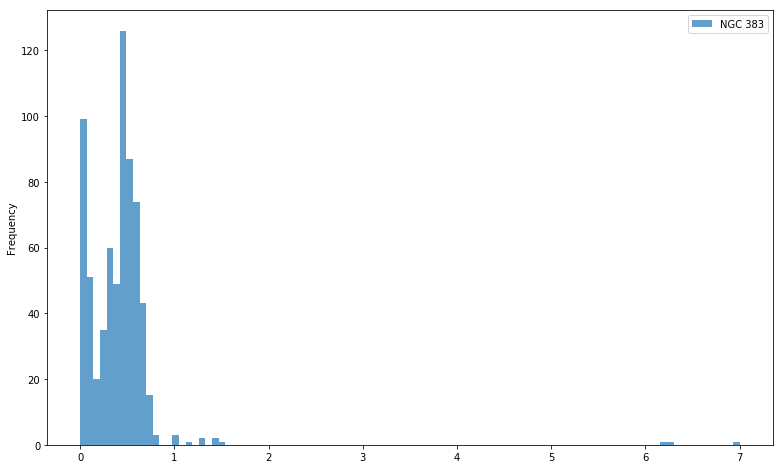

In [6]:
ngc383_hist = pd.DataFrame({ 'NGC 383': ngc383.Redshift }, columns=['NGC 383'])
ngc383_hist.plot.hist(alpha=0.7, figsize=(13,8), bins=100)

Center of NGC 383 has a redshift of 0.01700 +/- 0.00004
We want to zoom into the first spike and see if we can get the a clear Gaussian.

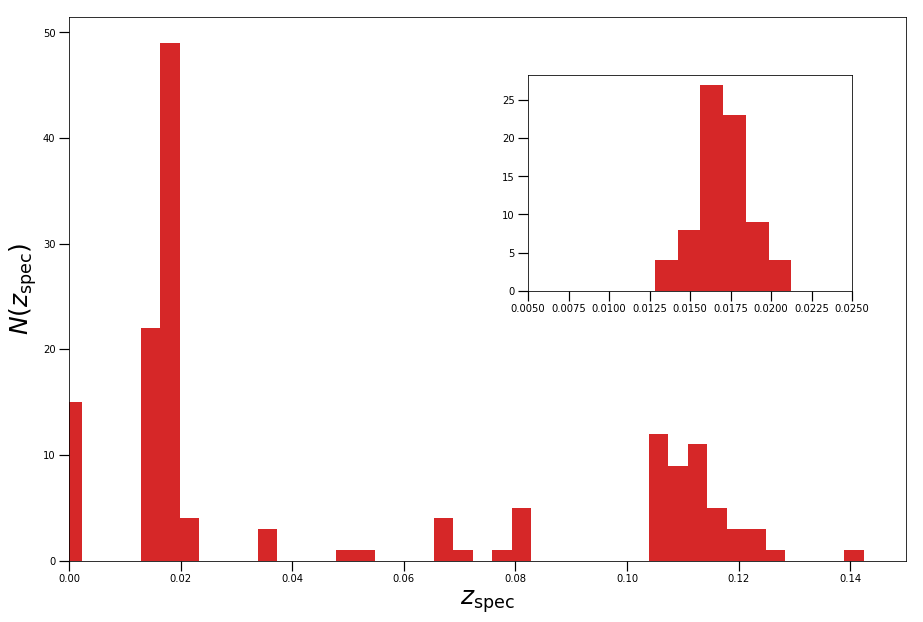

In [7]:
z = ngc383['Redshift']
fig = plt.figure(figsize=(15,10))
plt.hist(z,bins=2000,color='C3')
plt.xlim(0,0.15)
plt.tick_params('both', length=10, width=1.2, which='major') # bigger axis ticks
plt.xlabel('$z_\mathrm{spec}$',fontsize=25)
plt.ylabel('$N(z_\mathrm{spec})$',fontsize=25)

# insert subplot:
a = plt.axes([.55, .5, .3, .3])
plt.hist(z,bins=5000,color='C3')
plt.xlim(0.005,0.025)
plt.tick_params('both', length=10, width=1.2, which='major') # bigger axis ticks

### Conclusion
According to NED the center of NGC 383 has a redshift of 0.01700 +/- 0.00004. We use that value to determine the range of redshifts that belong to the cluster. We can see an apparent Gaussian curve that ranges from 0.0125 and 0.0225. We conclude that galaxies with redshifts within this range are in the foreground of NGC 383.

In [8]:
# Export merged list
ngc383.to_csv(r'../datasets/complete/ngc383.csv', index=False)